# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

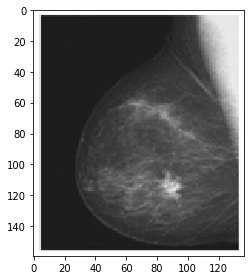

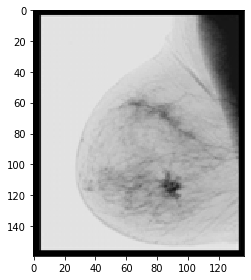

In [3]:
'''
1
Negative Transformation
'''

def negative_transform(image):
    return 1 - image

image = io.imread('imgs/Picture1.png')
image = rgb2gray(image)

transformed_img = negative_transform(image)

io.imshow(image)
io.show()

io.imshow(transformed_img)
io.show()


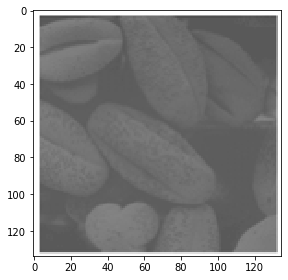

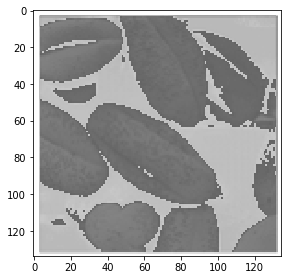

In [4]:
'''
2
Contrast Enhancement
'''

def enhance_contrast(image):
    enhanced_image = image.copy()
    for i in range(enhanced_image.shape[0]):
        for j in range(enhanced_image.shape[1]):
            if (enhanced_image[i][j] <= 100 / 255):
                enhanced_image[i][j] = (1.5 *255 * enhanced_image[i][j] + 50) / 255
    return enhanced_image

image = io.imread('imgs/Picture2.png')
image = rgb2gray(image)
enhanced_image = enhance_contrast(image)

io.imshow(image)
io.show()

io.imshow(enhanced_image)
io.show()

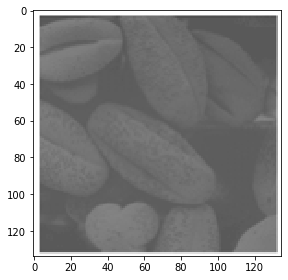

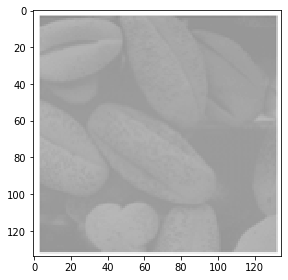

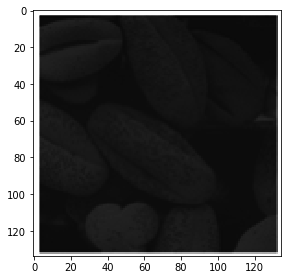

In [5]:
'''
3
Gamma Correction
'''
def correct_gamma(image, c, gamma):
    corrected_image = image.copy()
    for i in range(corrected_image.shape[0]):
        for j in range(corrected_image.shape[1]):
            corrected_image[i][j] = (c * corrected_image[i][j] ** gamma)
    return corrected_image

image = io.imread('imgs/Picture2.png')
image = rgb2gray(image)

corrected_image_low_gamma = correct_gamma(image, 1, 0.5)
corrected_image_high_gamma = correct_gamma(image, 1, 3)

io.imshow(image)
io.show()

io.imshow(corrected_image_low_gamma, )
io.show()

io.imshow(corrected_image_high_gamma)
io.show()

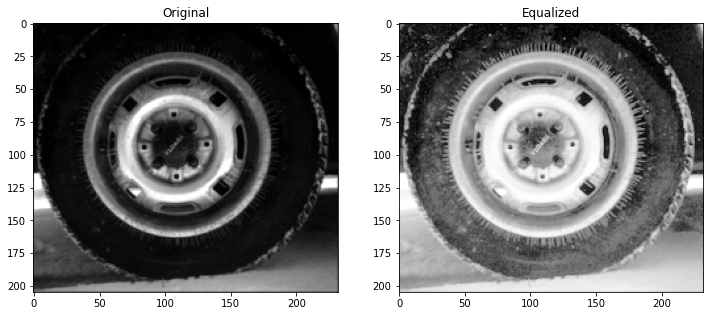

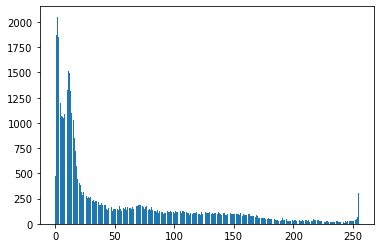

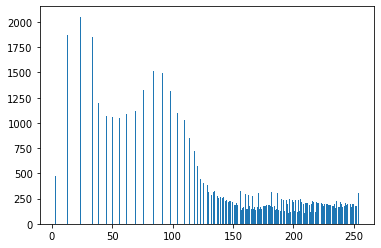

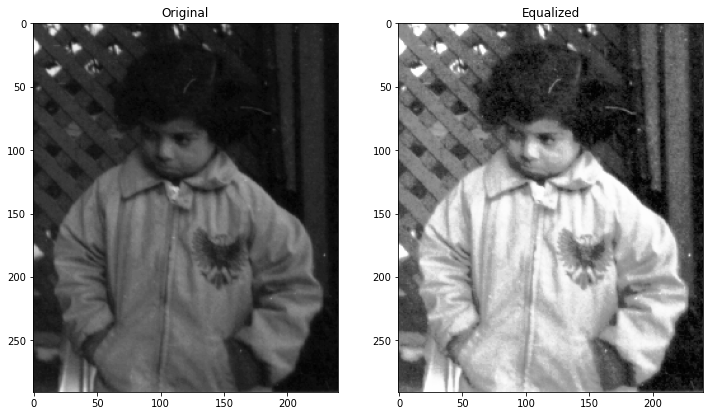

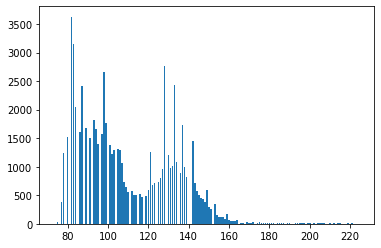

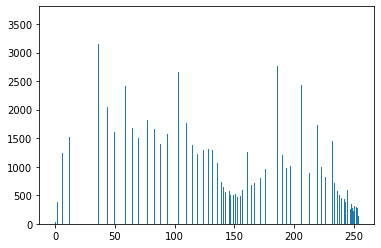

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name, ext=None, nbins=256):

    histo, bins = histogram(name, nbins)
    original_histo = np.zeros(256)
    original_histo[bins] = histo
    
    probability = original_histo / np.sum(original_histo)

    cum_probability = np.zeros(256)
    cum_probability[0] = probability[0]
    for i in range(1, 256):
        cum_probability[i] = cum_probability[i - 1] + probability[i]
    
    mapped_scale = np.round(cum_probability * (255))

    equalized_image = np.zeros(name.shape)
    equalized_image = mapped_scale[name]
    # for i in range(equalized_image.shape[0]):
    #     for j in range(equalized_image.shape[1]):
    #         equalized_image[i][j] = mapped_scale[name[i][j]]
    
    return equalized_image
    
    
image = io.imread('imgs/tire.tif')
equalized_image = getImageWithHist(image)

show_images([image, equalized_image], ['Original', 'Equalized'])

showHist(image)
showHist(equalized_image)

image = io.imread('imgs/pout.tif')
equalized_image = getImageWithHist(image)

show_images([image, equalized_image], ['Original', 'Equalized'])

showHist(image)
showHist(equalized_image)

    
